In [1]:
# TODO: import tensorflow and call it tf
import tensorflow as tf

In [2]:
# TODO: load mnist dataset from keras
mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
# TODO: try to view the mnist dataset // mnist = ((?,?),(?,?)) minst is a tuple of 2 things
# hints: type, length
#len(mnist)
#type(mnist)
print(len(mnist[0]), type(mnist[1][0]))

2 <class 'numpy.ndarray'>


https://www.tensorflow.org/tutorials/keras/classification

In [4]:
# split mnist dataset to train and test images and lables
(train_images, train_labels), (test_images, test_labels) = mnist

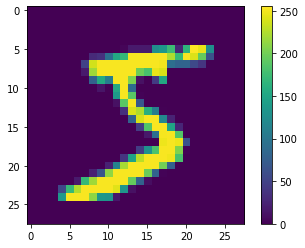

In [5]:
# show image
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0]) # 1st data record is '5'
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# TODO: scale the images to 0~1
# reason: https://www.linkedin.com/pulse/keras-image-preprocessing-scaling-pixels-training-adwin-jahn/

train_images = train_images / 255.0

test_images = test_images / 255.0

print(train_images.min())
print(train_images.max())

0.0
1.0


In [7]:
# TODO: adjust the model

model = tf.keras.Sequential([
    #https://www.tensorflow.org/api_docs/python/tf/keras/activations

    # kernel_regularizer='l2',
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, kernel_regularizer='l2', activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [8]:
# TODO: summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
# TODO: adjust hyperparameters (optimizer, loss func)
model.compile(#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers 
       optimizer='adam', # adam / SGD / RMSprop
       #https://www.tensorflow.org/api_docs/python/tf/keras/losses
       loss=tf.keras.losses.CategoricalCrossentropy(),
       metrics=['accuracy'])

**if categorical crossentropy (*just run once*)**

In [10]:
import tensorflow.keras as keras
num_categories = 10

train_labels = keras.utils.to_categorical(train_labels, num_categories)
test_labels = keras.utils.to_categorical(test_labels, num_categories)

In [17]:
# TODO: adjust epochs
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3823 - accuracy: 0.9240 - val_loss: 0.3060 - val_accuracy: 0.9523
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3433 - accuracy: 0.9367 - val_loss: 0.2849 - val_accuracy: 0.9587
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3289 - accuracy: 0.9411 - val_loss: 0.2806 - val_accuracy: 0.9540
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.9448 - val_loss: 0.2533 - val_accuracy: 0.9640
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9476 - val_loss: 0.2720 - val_accuracy: 0.9565
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.9492 - val_loss: 0.2531 - val_accuracy: 0.9662
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2791 - accuracy: 0.9512 - val_loss: 0.2459 - val_accuracy:

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.2528 - accuracy: 0.9561

Test accuracy: 0.9560999870300293


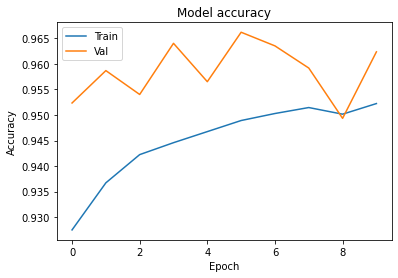

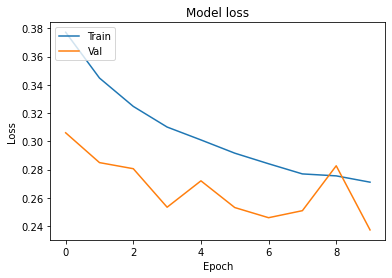

In [19]:
#plot plot plot

import matplotlib.pyplot as plt

# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

save/load model

https://www.tensorflow.org/guide/keras/save_and_serialize

In [20]:
# save model to a h5 file
model.save("my_model.h5")

In [22]:
loaded_model = tf.keras.models.load_model('my_model.h5')

In [23]:
loaded_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2528 - accuracy: 0.9561


[0.2528381049633026, 0.9560999870300293]